# Практические занятия №9-10

## 1. Некоторые операции с классами и объектами

**1.1.** (0.1 балла)

Напишите код, который выведет на экране все имена полей объекта произвольного пользовательского класса, кроме служебных имен.

In [1]:
class Kanji:
    def __init__(self):
        self.dynamic = 12
        self.ads = 1

    DEFAULT_STROKES = 2
    DEFAULT_READINGS = 1


k = Kanji()
print(k)
print(dir(Kanji))
print(dir(k))
print(vars(Kanji))
print(vars(k).keys())
print(Kanji.__dict__)
print(k.__dict__)

['DEFAULT_READINGS', 'DEFAULT_STROKES', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
['DEFAULT_READINGS', 'DEFAULT_STROKES', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ads', 'dynamic']
{'__module__': '__main__', '__init__': <function Kanji.__init__ at 0x00000202038620C0>, 'DEFAULT_STROKES': 2, 'DEFAULT_READINGS': 1, '__dict__': <attribute '__dict__' of 'Kanji' obje

**1.2.** (0.1 балла)

Напишите код, который по имени метода, заданному строкой, вызовет этот метод в объекте некоторого пользовательского класса.

In [2]:
class Kanji:
    def read(self):
        print("Reading: 会う")


def call_method(o, name):
    return getattr(o, name)()


k = Kanji()
call_method(k, 'read')


Reading: 会う


**1.3.** (0.1 балла)

С кодом ниже что-то не так. Что именно неправильно и как это исправить?

```Python
class A:
    pass

class B(A):
    pass

class C(A, B):
    pass
```

In [3]:
class A:
    pass


class B(A):
    pass


class C(B):
    pass

**1.4.** (0.2 балла)

Напишите функцию-однострочник get_inheritance для вывода строки, отражающей иерархию наследования для входного класса.

Пример:

```Python
>>> print(get_inheritance(OSError))
OSError -> Exception -> BaseException -> object
```

In [4]:
def get_inheritance(name):
    return " -> ".join(occur.__name__ for occur in name.__mro__)


print(get_inheritance(OSError))

OSError -> Exception -> BaseException -> object


## 2. Своя реализация структуры данных

**2.1.** (0.3 балла)

Реализуйте хэш-таблицу, аналог встроенного dict. Используйте для внутренней реализации список пар ключ-значение. В реализации предполагается применение функции [hash()](https://pythonim.ru/osnovy/funktsiya-hash-v-python?ysclid=lg9h2elo1h932374763). Создайте [методы](https://proproprogs.ru/python_oop/magicheskie-metody-getitem-setitem-delitem?ysclid=lg9l51a8it750531401) для чтения, записи и получения размера хэш-таблицы:
*   `__setitem__` - установка значения для заданного ключа;
*   `__getitem__` - возврат значения по ключу. Учесть ситуацию с вызовом исключения KeyError;
*   `__len__` - возврат количества пар ключ-значение в хэш-таблице.

In [5]:
class MyHashTable:
    keys = [None]
    values = [None]

    def __setitem__(self, key, value):
        self.keys.append(hash(key))
        self.values.append(value)

    def __getitem__(self, key):
        if hash(key) not in self.keys:
            raise KeyError(f"No such key: {key}")
        return self.values[self.keys.index(hash(key))]

    def __len__(self):
        return len(self.values)



table = MyHashTable()
table["key"] = 12
table['k2'] = 1243
print(table["key"])
print(len(table))
print(table["12"])

12
3


KeyError: 'No such key: 12'

## 3. Задачи на работу с объектами

#### Разминка.

Ориентированный граф может быть представлен как:

$G = \langle V, E \rangle$, где

$V$ — множество вершин графа, имеющее вид $\{v_1, v_2, \cdots, v_n\}$,  
$E$ — множество связей между вершинами $V$, каждая связь имеет вид $\langle v_i, v_j \rangle$.

Библиотека `graphviz` позволяет осуществлять визуализацию графов с помощью предметно-ориентированного языка DOT, предназначенного для описания графов. Например, граф $G_1=\langle V_1, E_1 \rangle$, где $V_1=\{v_1, v_2\}$, а $E_1=\{\langle v_1, v_2 \rangle, \langle v_2, v_1 \rangle \}$ может быть описан и визуализирован при помощи `graphviz` следующим образом:



```python
import graphviz

graphviz.Source("""
digraph {
  1 [label="A"]
  2 [label="B"]
  1 -> 2
  2 -> 1
}
""")
```



In [2]:
import graphviz

graphviz.Source("""
digraph {
  1 [label="A"]
  2 [label="B"]
  1 -> 2
  2 -> 1
}
""")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

**3.1.** (0.2 балла)

Реализовать функцию `draw(vertices, edges)`, которая принимает на вход список вершин `vertices`, список рёбер `edges`, преобразует вершины и рёбра в строку на языке DOT и выполняет визуализацию графа $G=\langle V, E \rangle$ при помощи `graphviz` по примеру выше. Пример использования:

```python
draw([(1, 'v1'), (2, 'v2')], [(1, 2), (2, 3), (2, 2)])
```

Ожидаемый результат:
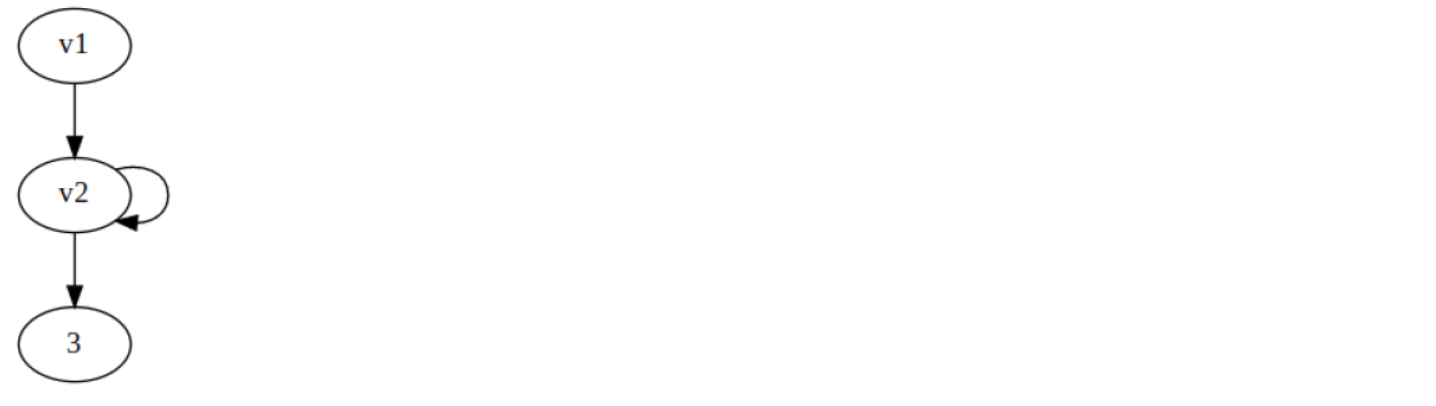

Динамическая система – объект или процесс, для которого однозначно определено понятие *состояния*, и задан закон, описывающий *изменение* начального состояния с течением времени. Динамическая система может быть представлена множеством состояний $S$, множеством времён $T$ и отображением $f: S \times T \rightarrow S$, описывающим процесс эволюции системы.

**3.2.** (0.3 балла)

Логистическое отображение `LogisticMap` описывает одну из простейших динамических систем:

$x_{t+1} = \mu x_{t} (1 - x_{t})$, где

$t$ и $t+1$ — моменты времени;  
$x_{t}$ и $x_{t+1}$ — состояния системы в момент $t$ и $t+1$;  
$\mu$ — [бифуркационный](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B1%D0%B8%D1%84%D1%83%D1%80%D0%BA%D0%B0%D1%86%D0%B8%D0%B9) параметр, $\mu \in [2.0, 4.0]$.

Реализуйте классы `Chaos` и `LogisticMap` по UML-диаграмме. Метод `stabilize` класса `Chaos` 1000 раз подряд вызывает метод `next` при **инициализации**. Класс `LogisticMap` переопределяет метод `next` базового класса `Chaos` по формуле выше. 

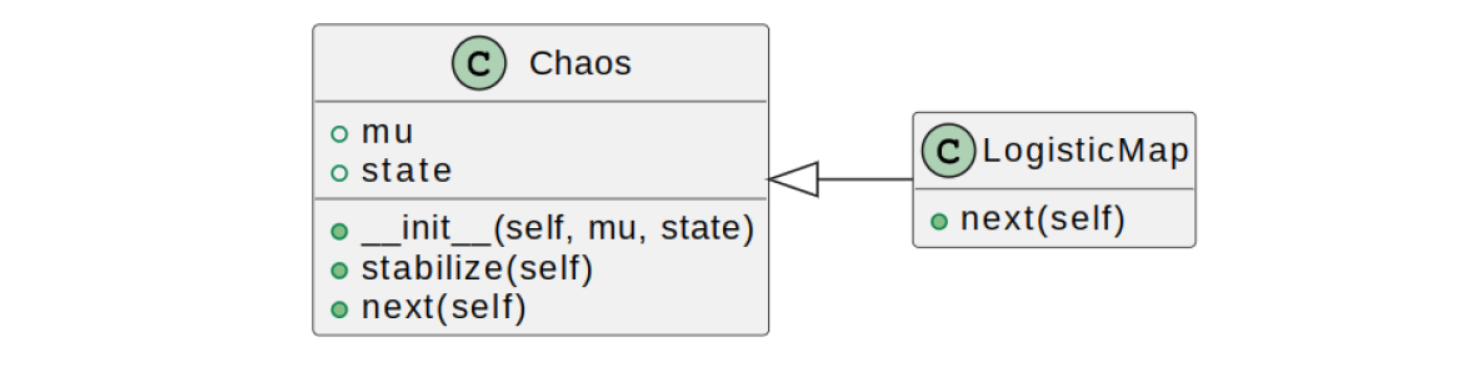

Как изменяется состояние системы `LogisticMap` при повторных вызовах метода `next` при значениях параметра бифуркации $\mu \in \{ 2, 3.2, 3.5, 3.55 \}$ и $x_0=0.1$?

Ожидаемый результат:

```python
o = LogisticMap(2, 0.1)
o.next(), o.next(), o.next()
```

```python
>>> (0.5, 0.5, 0.5)
```


**3.3.** (0.2 балла)

Создать функцию `visualize` для визуализации графа изменений состояния класса `LogisticMap` для $\mu \in \{ 2, 3.2, 3.5, 3.55 \}$, используя функцию `draw`.

Ожидаемый результат:

```python
visualize(LogisticMap(3.5, 0.1))
```
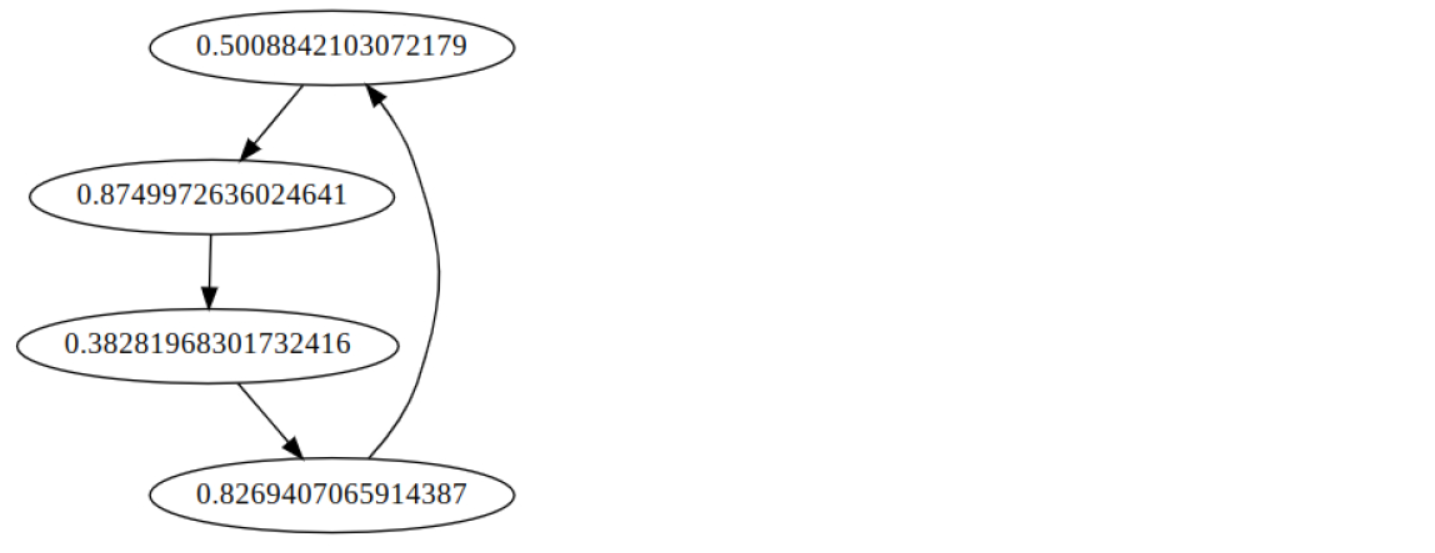


**3.4.** (0.3 балла)

Построить диаграмму бифуркаций для логистического отображения при $\mu \in [1, 4]$. Диаграмма бифуркаций может быть визуализирована с помощью библиотеки `matplotlib` и метода `scatter`. Горизонтальная ось соответствует различным значениям параметра бифуркации $\mu$, вертикальная ось соответствует различным состояниям, которые принимает система при соответствующем значении $\mu$.

Пример ожидаемого результата:

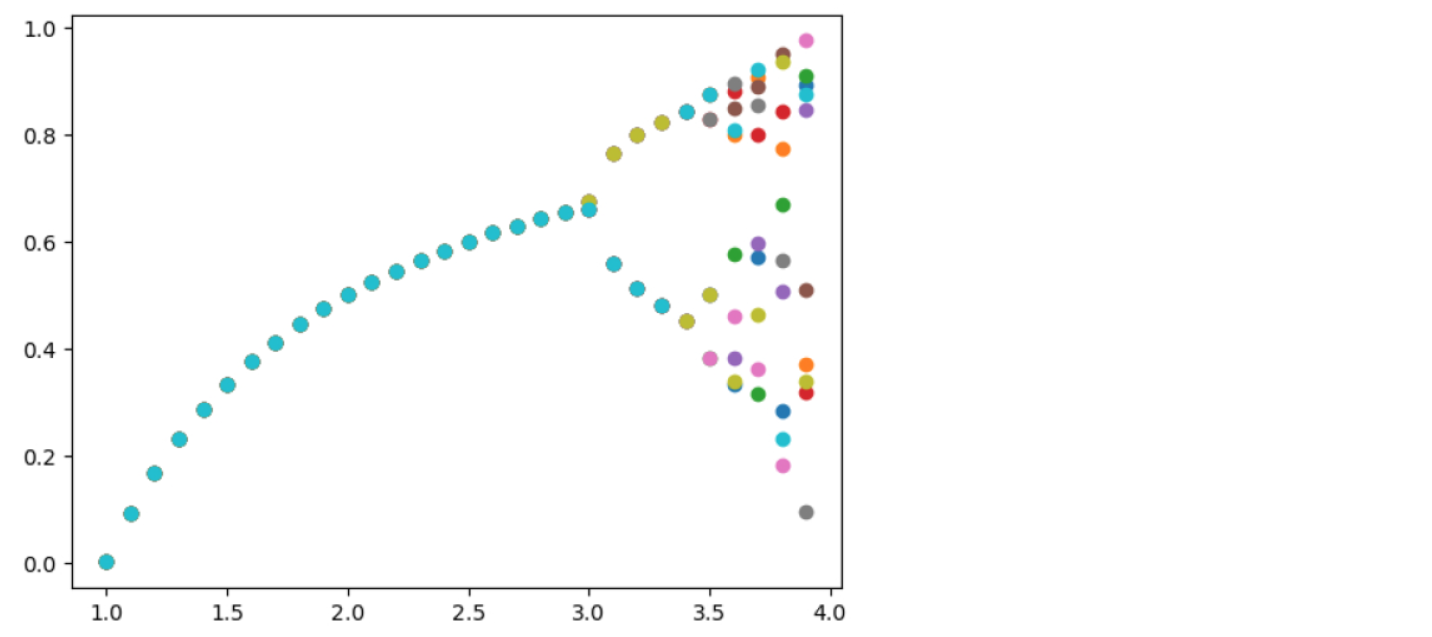

**3.5.** (0.2 балла)

Полученную динамическую систему можно использовать в качестве генераторов псевдослучайных чисел. Какое распределение имеет псевдослучайная величина, порождаемая динамической системой `LogisticMap`, при $\mu \in \{4.0\}$?

Пример ожидаемого результата:

```python
o = LogisticMap(mu=4.0, state=0.1)
```
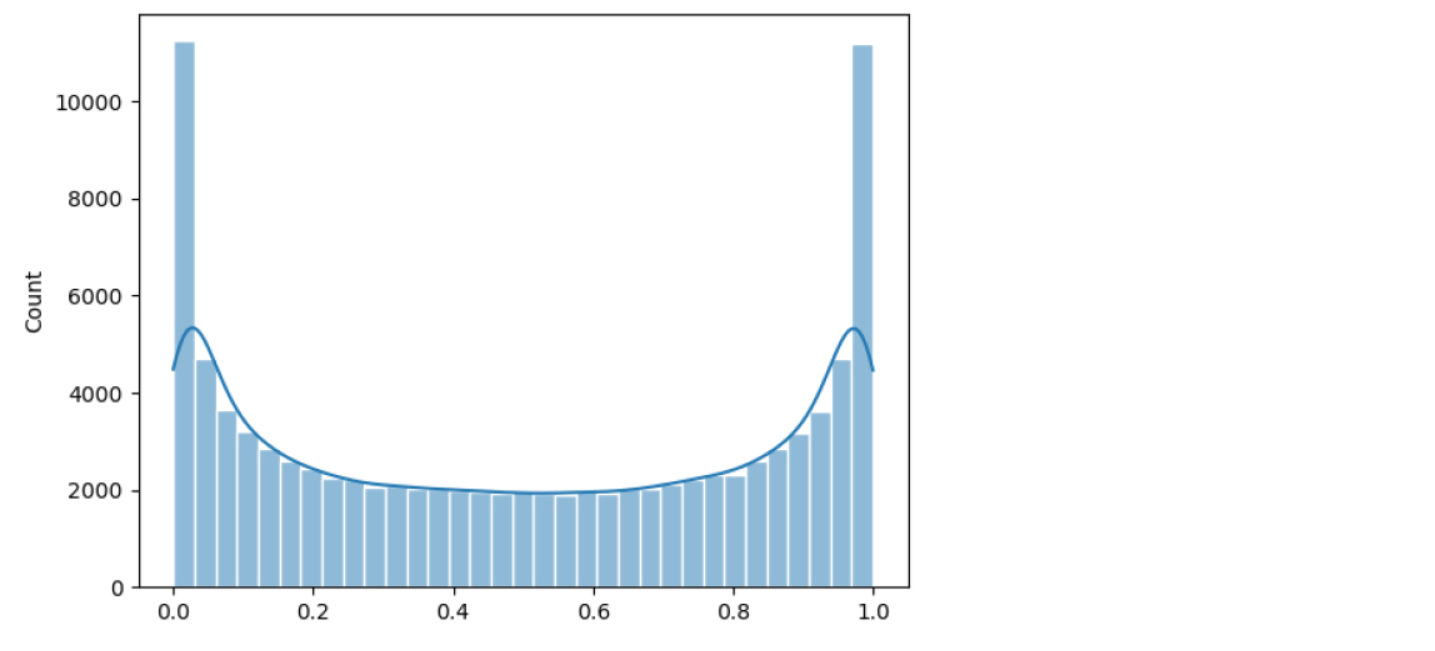

## 4. Предметно-ориентированный язык HTML-тегов

**4.1.** (0.7 балла)

Реализовать язык [HTML-тегов](http://htmlbook.ru/html?ysclid=lg9fjxymfn509817968) с помощью [менеджера контекста](https://devpractice.ru/python-lesson-21-context-manager/?ysclid=lg9fqfsqgb593521542).

Реализовать классы для выполнения следующего примера:

```Python
html = HTML()
with html.body():
    with html.div():
        with html.div():
            html.p('Первая строка.')
            html.p('Вторая строка.')
        with html.div():
            html.p('Третья строка.')
```

С помощью html.get_code() выдается следующий результат:

```HTML
<body>
<div>
<div>
<p>Первая строка.</p>
<p>Вторая строка.</p>
</div>
<div>
<p>Третья строка.</p>
</div>
</div>
</body>
```

## 5. Генератор API-документации

В задачах этого раздела необходимо использовать модуль [inspect](https://pythonim.ru/moduli/inspect-python?ysclid=lg9exnptic450767906).

**5.1.** (0.8 балла)

Реализуйте генератор документации на модуль Питона, задаваемый именем файла. Результат необходимо генерировать в формате Markdown.

Пример исходного модуля:

```Python
'''
Описание M.
'''


class A:
    '''
    Описание A.
    '''
    def meth1(self, x: int) -> int:
        '''
        Описание meth1.
        '''
        return x


class B:
    '''
    Описание B.
    '''
    def meth2(self):
        '''
        Описание meth2.
        '''
        pass

    def meth3(self):
        '''
        Описание meth3.
        '''
        pass


def func(a, b):
    '''
    Описание func.
    '''
    pass
```

Результат генерации:

```Markdown
# Модуль m

Описание M.

## Класс A

Описание A.

* **Метод** `meth1(self, x: int) -> int`

Описание meth1.

## Класс B

Описание B.

* **Метод** `meth2(self)`

Описание meth2.

* **Метод** `meth3(self)`

Описание meth3.

## Функция func

Сигнатура: `func(a, b)`

Описание func.
```

**5.2.** (1 балл)

Реализуйте инструмент визуализации иерархии модулей в проекте. Аргументом задается путь к проекту, а анализ модулей должен производиться включая и подкаталоги.

***Распределение сложных задач:***

**Задача 3:** с 3.1. по 3.5. - итого 1.2 балла.

**Задача 4:** 4.1.  - итого 0.7 балла.

**Задача 5:** 5.1. и 5.2. - итого 1.8 балла.